<a href="https://colab.research.google.com/github/jalvaradoc/Repositorio_Algoritmos/blob/main/Lab5/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
#importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import math

In [100]:
#Solicitamos los parametros 
Tam_genoma = int(input("Ingresar el tamaño del genoma para cada individuo: "))
Tam_poblacion = int(input("Ingrese la cantidad de individuos que hay en cada generacion: "))
Prob_Mutacion = float(input("Ingrese la probabilidad de mutar de un individuo: "))
Generaciones = int(input("Ingrese la cantidad de generaciones a ejecutar: "))
Rango = float(input("Ingrese el rango maximo para el que se va a buscar en la funcion: "))

Ingresar el tamaño del genoma para cada individuo: 15
Ingrese la cantidad de individuos que hay en cada generacion: 100
Ingrese la probabilidad de mutar de un individuo: 0.005
Ingrese la cantidad de generaciones a ejecutar: 200
Ingrese el rango maximo para el que se va a buscar en la funcion: 10


In [101]:
#Creamos la funcion a la cual vamos a bucar maximizar
def fx(x):
    #y = (math.sin(x)+1)/2
    y = (math.sin(x-1)/(x-1))+1
    return y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


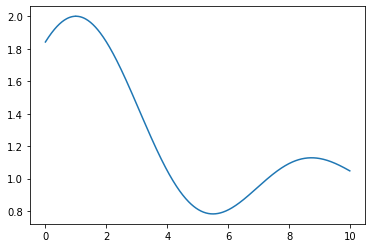

In [102]:
# imprimimos la funcion en el rango que vammos a buscar el maximo
y_axis = []
x_axis=np.arange(0,Rango,0.02)

for num in x_axis:
    y_axis.append(fx(num))

plt.plot(x_axis,y_axis)

In [103]:
#Funcion para volver un individuo en decimal
def listToDecimal(num):
    decimal=0
    for i in range(len(num)):
        decimal+=num[i]*10**(-i)
    return decimal

In [104]:
#Genetic pool
aux = np.arange(0,int(Rango),1)
genetic_pool=[aux,[0,1,2,3,4,5,6,7,8,9]]

#Crear la poblacion inicial
poblacion = []

for i in range(Tam_poblacion):
    individuo = []
    individuo += [np.random.choice(genetic_pool[0])]
    individuo += list(np.random.choice(genetic_pool[1],Tam_genoma-1))
    poblacion.append(individuo)
poblacion[:10]

[[1, 1, 3, 6, 8, 7, 9, 8, 8, 1, 7, 3, 1, 0, 6],
 [1, 7, 5, 2, 9, 4, 6, 3, 5, 5, 2, 9, 0, 3, 6],
 [3, 7, 5, 9, 3, 4, 6, 6, 6, 4, 3, 3, 7, 1, 2],
 [8, 8, 6, 0, 5, 8, 5, 7, 1, 2, 5, 1, 7, 5, 6],
 [7, 6, 3, 0, 4, 1, 4, 2, 1, 8, 7, 5, 8, 1, 9],
 [2, 6, 5, 2, 7, 7, 3, 6, 1, 9, 8, 6, 8, 5, 5],
 [2, 9, 0, 1, 3, 4, 6, 3, 4, 1, 2, 2, 6, 6, 3],
 [1, 0, 8, 5, 6, 1, 5, 3, 1, 3, 5, 2, 6, 2, 9],
 [4, 3, 3, 9, 1, 9, 0, 1, 2, 3, 2, 1, 7, 1, 3],
 [2, 1, 1, 6, 0, 3, 1, 3, 6, 4, 8, 2, 9, 6, 7]]

In [105]:
#Funcion de mutacion
def mutate(individuals, prob, pool):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]
        
        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]#+1 permite omitir el gen antiguo por el mutado
        individuals[i] = mutate_individual

In [106]:
size_poblacion = len(poblacion)
maximo_funcion = 2
Mejores_individuos = []
error_poblaciones = []

for _ in range(Generaciones):
    
    fitness =[]

    #extraigo los valores de y para medir su éxito
    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = fx(x)
        fitness += [y]

    #convierto fitnees en un vector para realizar operaciones
    #más fácilmente
    fitness = np.array(fitness)

    #calcular error
    error_individuos = 2-fitness
    error_generacion =   error_individuos.sum()/Tam_poblacion
    error_poblaciones+=[error_generacion]


    #divido todos los valores de y para la suma total
    #y así obtener valores entre 0 y 1
    fitness=fitness/fitness.sum()  

        
    
    # se reproducen los mejores individuos
    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(Tam_genoma)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    
    
    poblacion = offspring
    
    #####
    # MUTACIONES
    ####
     
    mutate(poblacion,Prob_Mutacion,genetic_pool)
    Mejores_individuos += [listToDecimal(poblacion[np.where(fitness == fitness.max())[0][0]])]




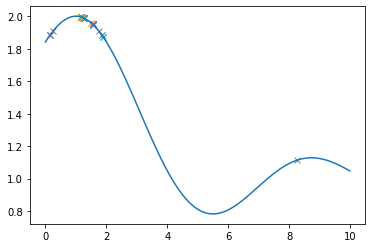

In [107]:
#imprimir la pablacion resultante
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

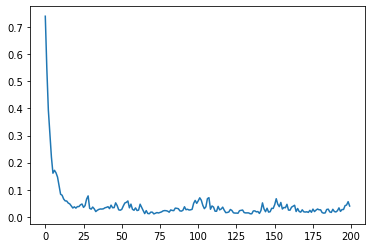

In [108]:
# imprimimos el error en cada generacion
y_axis2 = error_poblaciones
x_axis2=np.arange(0,Generaciones)

plt.plot(x_axis2,y_axis2)

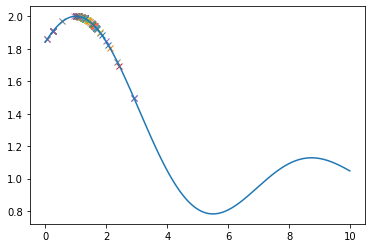

In [109]:
#imprimir mejores individuos de cada generacion
for i in range (len(Mejores_individuos)) :
    x = Mejores_individuos[i]
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In [110]:
#imprimir mejor individuo de la ultima generacion
print(Mejores_individuos[Generaciones-1])
print(listToDecimal(poblacion[np.where(fitness == fitness.max())[0][0]]))
print(fx(Mejores_individuos[Generaciones-1]))

1.2576252014233398
1.2576252014233398
1.9889748602734292
